# Heart Disease Data Set

Data Set Information:

This database contains 14 attributes . In particular, the Cleveland database is the only one that has been used by ML researchers to this date. The "goal" field refers to the presence of heart disease in the patient. It is integer valued from 0 (no presence) to 4. Experiments with the Cleveland database have concentrated on simply attempting to distinguish presence (values 1,2,3,4) from absence (value 0).



Only 14 attributes used:
1. #3 (age)
2. #4 (sex)
3. #9 (cp)
4. #10 (trestbps)
5. #12 (chol)
6. #16 (fbs)
7. #19 (restecg)
8. #32 (thalach)
9. #38 (exang)
10. #40 (oldpeak)
11. #41 (slope)
12. #44 (ca)
13. #51 (thal)
14. #58 (num) (the predicted attribute)



In [109]:
# Importing Common Libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [110]:
# Loading the dataset
col_Names=['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal','num']
df=pd.read_csv("heartdisease.csv",names=col_Names)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [111]:
df.shape

(303, 14)

In [112]:
df.info()
# The data is ready to be used for Modelling and prediction. But we need to identify the categorical variables too.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  num       303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [113]:
df.describe().round()
#Let's describe the dataset

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
count,303.0,303.0,303.0,303.0,303.0,303.0,303.0,303.0,303.0,303.0,303.0,303.0,303.0,303.0
mean,54.0,1.0,1.0,132.0,246.0,0.0,1.0,150.0,0.0,1.0,1.0,1.0,2.0,1.0
std,9.0,0.0,1.0,18.0,52.0,0.0,1.0,23.0,0.0,1.0,1.0,1.0,1.0,0.0
min,29.0,0.0,0.0,94.0,126.0,0.0,0.0,71.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,48.0,0.0,0.0,120.0,211.0,0.0,0.0,134.0,0.0,0.0,1.0,0.0,2.0,0.0
50%,55.0,1.0,1.0,130.0,240.0,0.0,1.0,153.0,0.0,1.0,1.0,0.0,2.0,1.0
75%,61.0,1.0,2.0,140.0,274.0,0.0,1.0,166.0,1.0,2.0,2.0,1.0,3.0,1.0
max,77.0,1.0,3.0,200.0,564.0,1.0,2.0,202.0,1.0,6.0,2.0,4.0,3.0,1.0


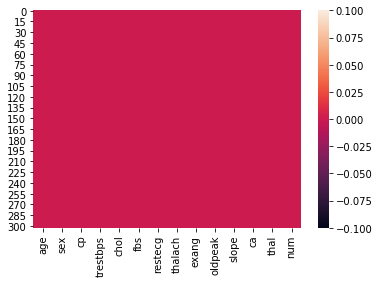

In [114]:
# Checking null values
sns.heatmap(df.isnull())
# No Null Values found

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000022BE39908>,
      dtype=object)

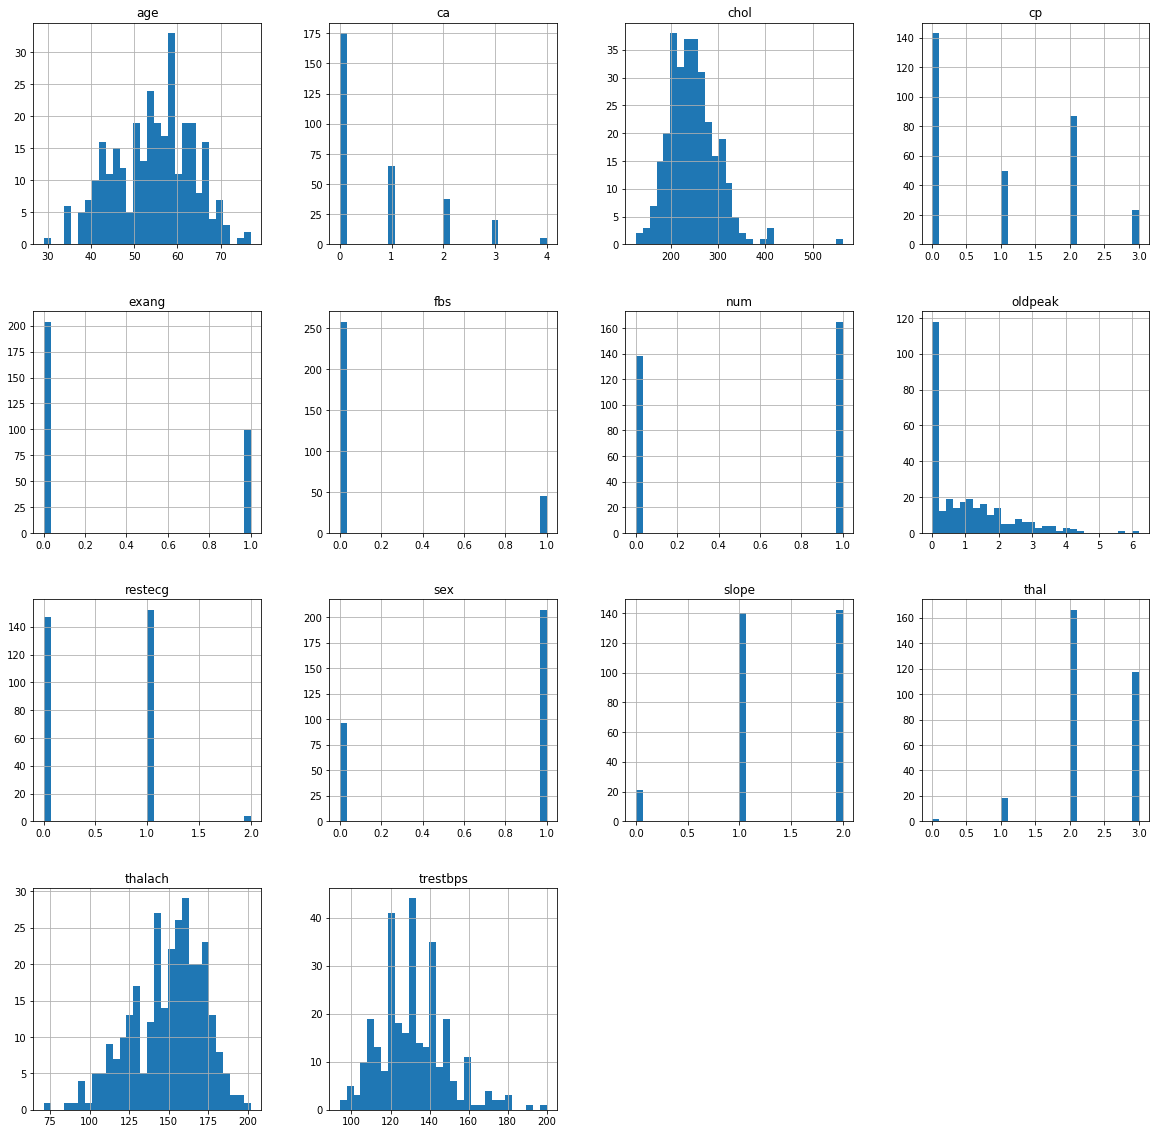

In [115]:
df.hist(figsize=(20,20),grid=True,layout=(4,4),bins=30)
# Here we're looking at how the features and target are distributed. We can also find out the categorical values
# The ones having (2-5) bars are categorical in nature, but converted into numeric to help in analyzing
# Categorival Values - [ca,cp,exang,fbs,restecg,sex,slope,thal]
# Continous Values - [age,chol,oldpeak,trestbps,thalach]

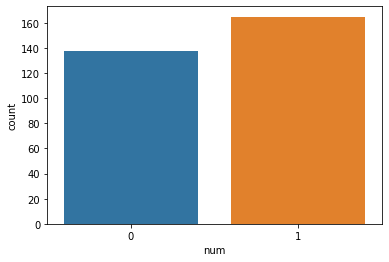

In [116]:
sns.countplot(df['num'])
# Blue is Safe and Orange is Heart Disease Patient

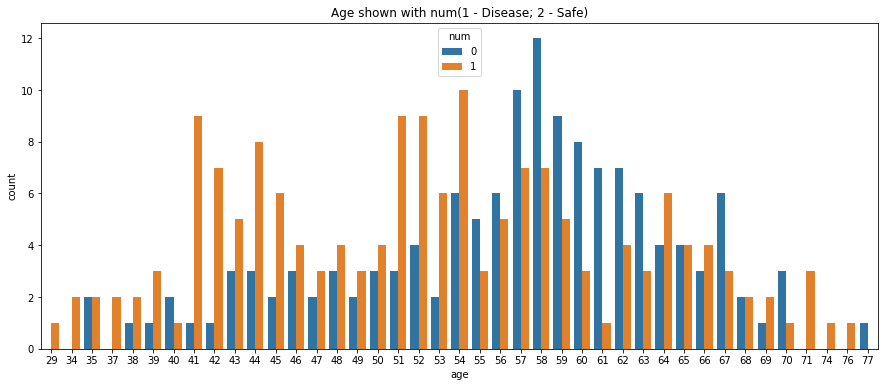

In [117]:
plt.figure(figsize=(15,6))
plt.title('Age shown with num(1 - Disease; 2 - Safe)')
sns.countplot(df['age'],hue=df['num'])
plt.show()

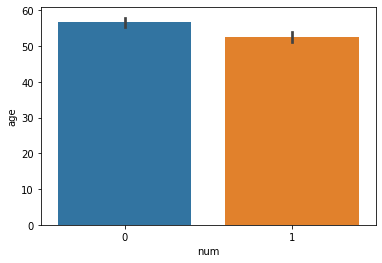

In [118]:
sns.barplot(x='num',y='age',data=df)
# Average age of people with disease is less than people without them

In [119]:
print('People with Heart disease\n',df['age'][df['num']==1].mode())
print('\nPeople with-out Heart disease\n',df['age'][df['num']==0].mode())

People with Heart disease
 0    54
dtype: int64

People with-out Heart disease
 0    58
dtype: int64


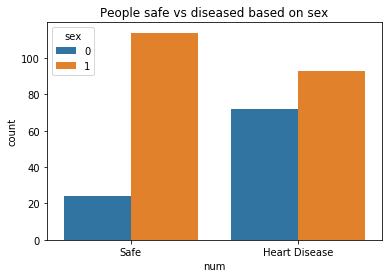

In [120]:
# Let's see data based on Gender
plt.figure(figsize=(6,4))
plt.title('People safe vs diseased based on sex')
sns.countplot(df['num'], hue=df['sex'])
plt.xticks(np.arange(0,2), ['Safe', 'Heart Disease'])
plt.show()
#1 indicates Males and 0 Females

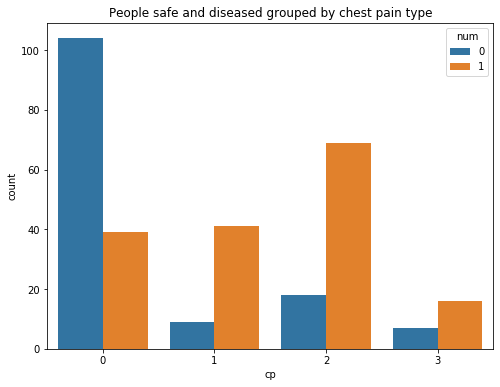

In [121]:
plt.figure(figsize=(8,6))
sns.countplot(x='cp',hue='num',data=df)
plt.title("People safe and diseased grouped by chest pain type")
plt.show()

# Type 2 chest pain has high proportion

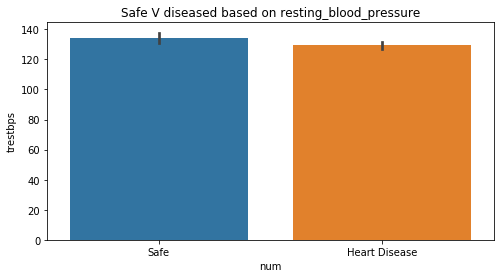

In [122]:
plt.figure(figsize=(8,4))
sns.barplot(x="num", y='trestbps',data = df)
plt.title('Safe V diseased based on resting_blood_pressure')
plt.xticks(np.arange(0,2), ['Safe', 'Heart Disease'])
plt.show()

# Indicates low bp is related to heart disease to some extent

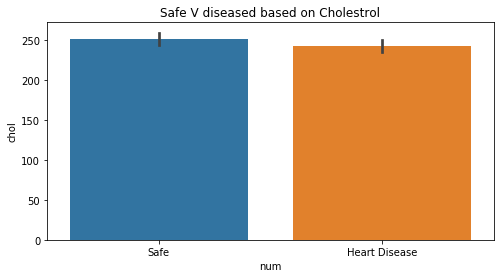

In [123]:
plt.figure(figsize=(8,4))
sns.barplot(x="num", y='chol',data = df)
plt.title('Safe V diseased based on Cholestrol')
plt.xticks(np.arange(0,2), ['Safe', 'Heart Disease'])
plt.show()

# Indicates low cholestrol is related to heart disease to some extent

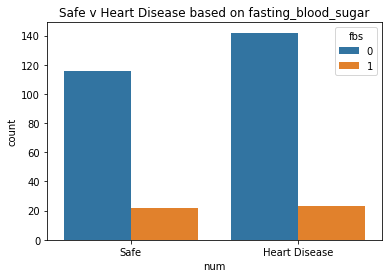

In [124]:
sns.countplot(hue='fbs',x ='num',data = df)
plt.title('Safe v Heart Disease based on fasting_blood_sugar')
plt.xticks(np.arange(0,2), ['Safe', 'Heart Disease'])
plt.show()
# Type 0 Fasting_blood-sugar is higher in both safe and diseased but slightly more in those with heaet disease

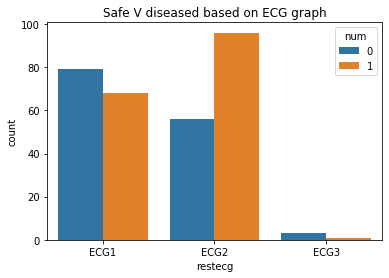

In [125]:
sns.countplot(x='restecg', hue ='num', data = df)
plt.title('Safe V diseased based on ECG graph')
plt.xticks(np.arange(0,3), ['ECG1', 'ECG2', 'ECG3'])
plt.show()

# Those with ECG2 are more prone to Heart Disease

In [126]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'],
      dtype='object')

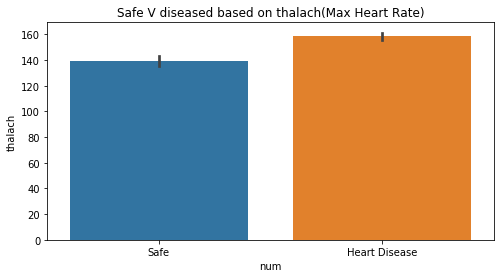

In [127]:
plt.figure(figsize=(8,4))
sns.barplot(x="num", y='thalach',data = df)
plt.title('Safe V diseased based on thalach(Max Heart Rate)')
plt.xticks(np.arange(0,2), ['Safe', 'Heart Disease'])
plt.show()

# Indicates that with Higher thalach(Max Heart Rate) there is more chance of Heart Disease

In [128]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'],
      dtype='object')

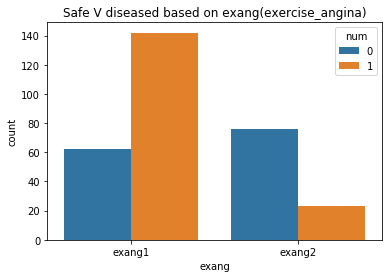

In [129]:
sns.countplot(x='exang', hue ='num', data = df)
plt.title('Safe V diseased based on exang(exercise_angina)')
plt.xticks(np.arange(0,2), ['exang1', 'exang2'])
plt.show()

# Those with the first type of exercise_angina are more prone to heart disease

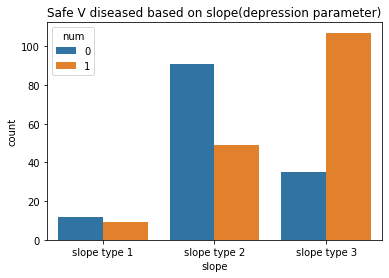

In [130]:
sns.countplot(x='slope', hue ='num', data = df)
plt.title('Safe V diseased based on slope(depression parameter)')
plt.xticks(np.arange(0,3), ['slope type 1', 'slope type 2','slope type 3'])
plt.show()

# Those with slope type 3 are more prone to heart disease

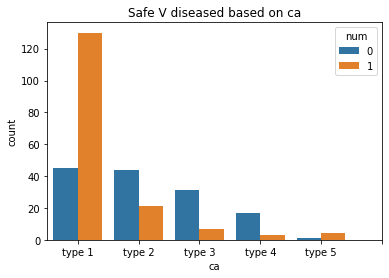

In [131]:
sns.countplot(x='ca', hue ='num', data = df)
plt.title('Safe V diseased based on ca')
plt.xticks(np.arange(0,6), ['type 1', 'type 2','type 3','type 4','type 5'])
plt.show()

# Those with slope type 1 are more prone to heart disease

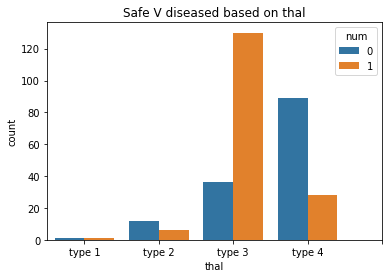

In [132]:
sns.countplot(x='thal', hue ='num', data = df)
plt.title('Safe V diseased based on thal')
plt.xticks(np.arange(0,5), ['type 1', 'type 2','type 3','type 4'])
plt.show()

# Those with slope type 3 are more prone to heart disease

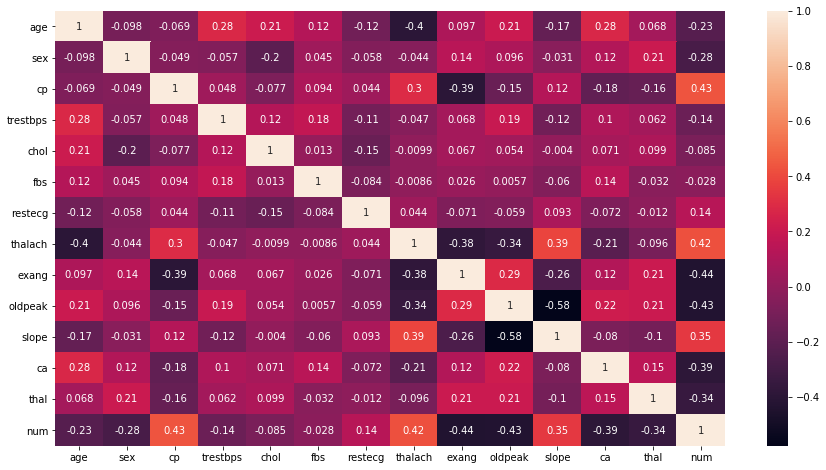

In [133]:
# Let's find Correlation values using heatmap
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(),annot=True)
plt.show()

# we don't see any strong correlation within variables

In [134]:
# For analysis Let's Categorize Age into 3 Categories:  As Minimum is 29 let's start with 20 and upto 80 (as max age is 77)
df['age'] = pd.cut(df['age'],bins=[0,40,60,100],labels=['Below_40','40_60','Above_60'])
df['age'].value_counts()

40_60       205
Above_60     79
Below_40     19
Name: age, dtype: int64

In [135]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['age']=le.fit_transform(df['age'])
df['age'].value_counts()

0    205
1     79
2     19
Name: age, dtype: int64

In [136]:
# We had earlier identified the categorical and continous variable. Let's see them again after replacing 'age' into categorical
# Categorival Values - [age,ca,cp,exang,fbs,restecg,sex,slope,thal]
# Continous Values - [chol,oldpeak,trestbps,thalach]
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,1,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,2,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,0,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,0,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,0,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [137]:
from scipy.stats import zscore
z = abs(zscore(df))
print(df.shape)
df=df[(z<3).all(axis=1)]
print(df.shape)
# Let's treat the outliers if any

(303, 14)
(287, 14)


In [138]:
# Let's check for skewness in continous variables
Values = ['chol','oldpeak','trestbps','thalach']
for val in Values:
    print(val,">>",df[val].skew(),"\n")


chol >> 0.24559086405825672 

oldpeak >> 0.9842561279833633 

trestbps >> 0.5307121908623567 

thalach >> -0.47386436722134984 



In [139]:
# As there's only 1 feature (oldpeak) Let's transform it manually, to treat for skewness
df['oldpeak']=np.log1p(df['oldpeak'])
df['oldpeak'].skew()

0.33139367288994465

In [140]:
# Let's do Standard Scaling on the Continous variables
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
Values = ['chol','oldpeak','trestbps','thalach']
df[Values]=sc.fit_transform(df[Values])
    
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,1,1,3,0.823925,-0.250907,1,0,0.008668,0,1.238435,0,0,1,1
1,2,1,2,-0.060392,0.119943,0,1,1.652290,0,1.845915,0,0,2,1
2,0,0,1,-0.060392,-0.883533,0,0,0.985957,0,0.614701,2,0,2,1
3,0,1,1,-0.649938,-0.185463,0,1,1.252490,0,0.051237,2,0,2,1
4,0,0,0,-0.649938,2.388672,0,1,0.586157,1,-0.179457,2,0,2,1


In [141]:
# Let's Separate our dataset into Features and target
x=df.drop(columns=["num"])
y=df[["num"]]

In [142]:
#to find random stat which gives maximum r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
def maxr2_score(model,x,y):
    max_r_score=0
    for r_state in range(42,101):
        x_train, x_test, y_train, y_test = train_test_split(x, y,random_state = r_state,test_size=0.20)
        model.fit(x_train,y_train)
        y_pred = model.predict(x_test)
        r2_scr=r2_score(y_test,y_pred)
        if r2_scr>max_r_score:
            max_r_score=r2_scr
            final_r_state=r_state
    print("max r2 score corresponding to ",final_r_state," is ",max_r_score)
    return final_r_state

In [143]:
#lets make a function which evaluates the model using cross_val_score
from sklearn.model_selection import cross_val_score
def model_evaluation(model,x,y):
    c_scores=cross_val_score(model,x,y,cv=5,scoring="r2")
    print("Mean r2 score for regressor: ",c_scores.mean())
    print("standard deviation in r2 score for regressor: ",c_scores.std())
    print(c_scores)

# We need Classification so let's start with
# Random Forest Classifier

In [144]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
rfc=RandomForestClassifier()
parameters = {"n_estimators":[10,50,100,150,200,250,500]}
clf = GridSearchCV(rfc, parameters, cv=5,scoring="r2")
clf.fit(x,y)
clf.best_params_

{'n_estimators': 200}

In [146]:
rfc=RandomForestClassifier(n_estimators=200)
r_state=maxr2_score(rfc,x,y)

max r2 score corresponding to  70  is  0.5857142857142856


# KNN Classifier

In [147]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
parameters = {"n_neighbors":range(2,20)}
clf = GridSearchCV(knn, parameters, cv=5,scoring="r2")
clf.fit(x, y)
clf.best_params_

{'n_neighbors': 18}

In [148]:
knn=KNeighborsClassifier(n_neighbors=18)
r_state=maxr2_score(knn,x,y)

max r2 score corresponding to  92  is  0.7187878787878788


# SVC

In [169]:
from sklearn.svm import SVC
import warnings
warnings.filterwarnings("ignore")
svc=SVC(probability=True)
parameters={"kernel":["linear", "poly", "rbf"],"C":[0.001,0.01,0.1,1,10]}
clf = GridSearchCV(svc, parameters, cv=5,scoring="r2")
clf.fit(x,y)
clf.best_params_

{'C': 1, 'kernel': 'linear'}

In [176]:
svc=SVC(kernel="linear",C=1,probability=True)
r_state=maxr2_score(svc,x,y) 

max r2 score corresponding to  81  is  0.7238095238095238


# Decision Tree Classifier

In [152]:
from sklearn.tree import DecisionTreeClassifier
dc=DecisionTreeClassifier()
r_state=maxr2_score(dc,x,y)

max r2 score corresponding to  79  is  0.5149342891278375


# Logistic Regression

In [154]:
from sklearn.linear_model import LogisticRegression
lg=LogisticRegression()
r_state=maxr2_score(lg,x,y)

max r2 score corresponding to  81  is  0.6547619047619047


# Gaussian NB

In [155]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
r_state=maxr2_score(gnb,x,y)

max r2 score corresponding to  50  is  0.6514423076923077


# Gradient Boosting

In [166]:
from sklearn.ensemble import GradientBoostingClassifier
gb=GradientBoostingClassifier()
r_state=maxr2_score(gb,x,y)

max r2 score corresponding to  70  is  0.5166666666666666


# Adaboost

In [167]:
from sklearn.ensemble import AdaBoostClassifier
ad=GradientBoostingClassifier()
r_state=maxr2_score(ad,x,y)

max r2 score corresponding to  81  is  0.5166666666666666


# Cross Validation

In [177]:
print("\n\nRandom Forest Classifier\n\n")
model_evaluation(rfc,x,y)

print("\n\nKNN Classifier\n\n")
model_evaluation(knn,x,y)

print("\n\nSVM Classifier\n\n")
model_evaluation(svc,x,y)

print("\n\nDecisionTree Classifier\n\n")
model_evaluation(dc,x,y)

print("\n\nLogistic Regression Classifier\n\n")
model_evaluation(lg,x,y)

print("\n\nGaussian NB Classifier\n\n")
model_evaluation(gnb,x,y)

print("\n\nGradient Boost\n\n")
model_evaluation(gb,x,y)

print("\n\nAdaboost Classifier\n\n")
model_evaluation(ad,x,y)



Random Forest Classifier


Mean r2 score for regressor:  0.3377084367245658
standard deviation in r2 score for regressor:  0.09739100101436166
[0.30288462 0.51201923 0.35875    0.29280397 0.22208437]


KNN Classifier


Mean r2 score for regressor:  0.2675936724565757
standard deviation in r2 score for regressor:  0.17670898358215895
[ 0.23317308  0.37259615  0.35875     0.43424318 -0.06079404]


SVM Classifier


Mean r2 score for regressor:  0.39387034739454096
standard deviation in r2 score for regressor:  0.13295216013974834
[0.30288462 0.58173077 0.21625    0.50496278 0.36352357]


DecisionTree Classifier


Mean r2 score for regressor:  -0.12654714640198506
standard deviation in r2 score for regressor:  0.12497090708427214
[-0.04567308 -0.18509615  0.0025     -0.34367246 -0.06079404]


Logistic Regression Classifier


Mean r2 score for regressor:  0.3374962779156328
standard deviation in r2 score for regressor:  0.14767996314656726
[0.30288462 0.51201923 0.21625    0.50496278 0.15

# Going with Support Vector Classifier

In [178]:
x_train, x_test, y_train, y_test = train_test_split(x, y,random_state = 81,test_size=0.20)
svc.fit(x_train,y_train)
y_pred = svc.predict(x_test)

r2 Score is: 0.7238095238095238
RMSE: 0.2626128657194451
Confusion matrix 
 [[28  2]
 [ 2 26]]
classification report 
               precision    recall  f1-score   support

           0       0.93      0.93      0.93        30
           1       0.93      0.93      0.93        28

    accuracy                           0.93        58
   macro avg       0.93      0.93      0.93        58
weighted avg       0.93      0.93      0.93        58

AUC_Score: 0.930952380952381
[0 0 1 1 1 1 1 0 0 1 0 1 0 0 0 0 0 1 0 1 0 0 1 1 1 0 1 0 0 1 1 0 1 1 0 0 0
 0 0 1 1 1 0 1 1 1 1 1 0 0 0 0 1 0 1 0 1 0]


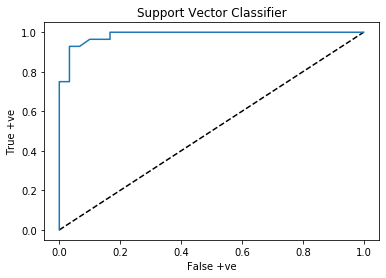

In [180]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score,roc_curve,roc_auc_score
print('r2 Score is:', r2_score(y_test,y_pred))
print('RMSE:',np.sqrt(mean_squared_error(y_test,y_pred)))
print("Confusion matrix \n",confusion_matrix(y_test,y_pred))
print("classification report \n",classification_report(y_test,y_pred))
print('AUC_Score:',roc_auc_score(y_test,y_pred))
y_pred_prob=svc.predict_proba(x_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='Support Vector Classifier')
plt.xlabel('False +ve')
plt.ylabel('True +ve')
plt.title('Support Vector Classifier')
plt.show
print(y_pred)

In [182]:
from sklearn.externals import joblib
joblib.dump(svc,'num_heart_disease.pkl')

['num_heart_disease.pkl']